# Accessing Planmap Geodata server

In this notebook we will access Planmap's data published through OGC/OWS services provided by the project's GeoServer instance, https://geoserver.planmap.eu.

We will use [OWSLib](v0.17.1) and [GeoPandas](v0.4.1) to access the data, and [Matplotlib](v3.0.3) to visualize.

[owslib]: https://geopython.github.io/OWSLib/
[geopandas]: http://geopandas.org/
[matplotlib]: https://matplotlib.org/

This is a template notebook, it is a starting point for the user to get momentum in accessing Planmap data:
* [WFS](#WFS)
* [WMS](#WMS)
* [WCS](#WCS)
* [Geopackage](#Geopackage)

In [1]:
PLANMAP = 'https://geoserver.planmap.eu'
PLANMAP_WMS = PLANMAP + '/wms'
PLANMAP_WCS = PLANMAP + '/wcs'
PLANMAP_WFS = PLANMAP + '/wfs'

In [2]:
from owslib import wcs, wfs, wms

import geopandas as gpd

%matplotlib inline
import matplotlib.pyplot as plt

## WFS

In [3]:
from owslib import wfs

pmwfs = wfs.WebFeatureService(PLANMAP_WFS)

In [4]:
pmwfs.version

'1.0.0'

In [5]:
list(pmwfs.contents)

['mars:PM-MAR-MS-Arsinoes_01_Structural_features',
 'mars:PM-MAR-MS-Arsinoes_01_Surface_features',
 'mars:PM-MAR-MS-Arsinoes_01_Units',
 'mars:PM-MAR-MS-Arsinoes_01_Units_contacts',
 'mars:PM-MAR-MS-Crommelin_01_Aeolian_Deposits',
 'mars:PM-MAR-MS-Crommelin_01_Craters_Outlines',
 'mars:PM-MAR-MS-Crommelin_01_Faults',
 'mars:PM-MAR-MS-Crommelin_01_Geologic_Contacts',
 'mars:PM-MAR-MS-Crommelin_01_Map_Boundaries',
 'mars:PM-MAR-MS-Crommelin_01_Surrounding_terrains',
 'mars:PM-MAR-MS-Crommelin_01_Units_Central_Crater_Bulge',
 'mars:PM-MAR-MS-Crommelin_01_Units_Crater_Rim',
 'mars:PM-MAR-MS-Crommelin_01_Units_Inner_Crater_Layered',
 'mars:PM-MAR-MS-Crommelin_01_Units_Secondary_Craters_Related',
 'mars:PM-MAR-MS-Crommelin_01_Yardang_Orientations',
 'mercury:PM-MER-MS-H05_3cc_01_Contacts',
 'mercury:PM-MER-MS-H05_3cc_01_Geological_Units_3_Classes',
 'mercury:PM-MER-MS-H05_3cc_01_Linear_Features',
 'mercury:PM-MER-MS-H05_3cc_01_Nomenclature',
 'mercury:PM-MER-MS-H05_3cc_01_Outline',
 'mercury

In [6]:
fea_ = pmwfs.getfeature(typename=['mars:PM-MAR-MS-Crommelin_01_Geologic_Contacts'], outputFormat='json')

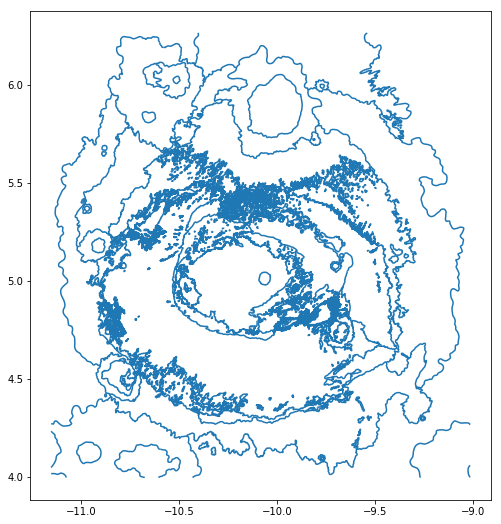

In [7]:
import geopandas as gpd
import json

fea_data = json.loads(fea_.getvalue())

gdf = gpd.GeoDataFrame.from_features(fea_data['features'])

gdf.plot(figsize=(12,9));

## WMS

In [8]:
from owslib import wms

pmwms = wms.WebMapService(PLANMAP_WMS)

Version of the WMS interface we are going to use:

In [9]:
pmwms.version

'1.1.1'

### Planmap's WMS content

In [10]:
list(pmwms.contents)

['mars:PM-MAR-MS-Arsinoes_01',
 'mars:PM-MAR-MS-Crommelin_01',
 'mercury:PM-MER-MS-H05_3cc_01',
 'mercury:PM-MER-MS-H05_5cc_01',
 'mercury:PM-MER-MS-Rembrandt_01',
 'moon:PM-MOO-MS-Copernicus_01',
 'moon:PM-MOO-MS-SPAApollo_01',
 'mars:PM-MAR-MS-Arsinoes_01_Structural_features',
 'mars:PM-MAR-MS-Arsinoes_01_Surface_features',
 'mars:PM-MAR-MS-Arsinoes_01_Units',
 'mars:PM-MAR-MS-Arsinoes_01_Units_contacts',
 'mars:PM-MAR-MS-Crommelin_01_Aeolian_Deposits',
 'mars:PM-MAR-MS-Crommelin_01_Craters_Outlines',
 'mars:PM-MAR-MS-Crommelin_01_Faults',
 'mars:PM-MAR-MS-Crommelin_01_Geologic_Contacts',
 'mars:PM-MAR-MS-Crommelin_01_Map_Boundaries',
 'mars:PM-MAR-MS-Crommelin_01_Merged_DEM_shaded_relief',
 'mars:PM-MAR-MS-Crommelin_01_Surrounding_terrains',
 'mars:PM-MAR-MS-Crommelin_01_Units_Central_Crater_Bulge',
 'mars:PM-MAR-MS-Crommelin_01_Units_Crater_Rim',
 'mars:PM-MAR-MS-Crommelin_01_Units_Inner_Crater_Layered',
 'mars:PM-MAR-MS-Crommelin_01_Units_Secondary_Craters_Related',
 'mars:PM-MAR-

The data provided by a WMS service is accessed through the `GetMap` service:

In [11]:
for op in pmwms.operations:
    print(op.name)

GetCapabilities
GetMap
GetFeatureInfo
DescribeLayer
GetLegendGraphic
GetStyles


#### Accessing Mercury's 5-classes geological units

In [12]:
map_ = pmwms['mars:PM-MAR-MS-Crommelin_01']
map_.id

'mars:PM-MAR-MS-Crommelin_01'

In [13]:
bbox = map_.boundingBox[:4]
crs = map_.boundingBox[-1]

In [14]:
map_data = pmwms.getmap(layers = [map_.id],
                         srs = crs,
                         size = (800,600),
                         bbox = bbox,
                         format = 'image/tiff')

The response from the WMS service is in _bytes_, we may write it down to a file or display it with `matplotlib` for instance.

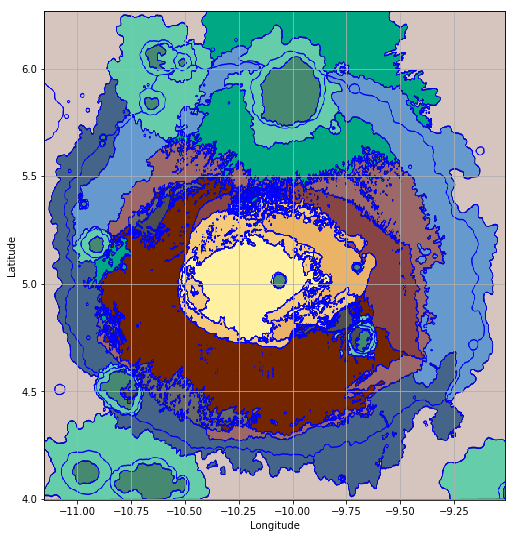

In [15]:
from matplotlib import pyplot as plt
import io

map_img = plt.imread(io.BytesIO(map_data.read()), format='tiff')

fig = plt.figure(figsize=(12,9))
ax = fig.gca()

extent = [bbox[i] for i in [0,2,1,3]]

ax.imshow(map_img, extent=extent, aspect=1, alpha=1)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True)

This is very much out of context, that axis are not showing the geographic location and we don't have the planet in the background to help us understand what are these features.

#### Download a basemap

In [16]:
basemap_data = pmwms.getmap(layers=['mars:PM-MAR-MS-Crommelin_01_Merged_DEM_shaded_relief'],
                             srs = map_.boundingBox[-1],
                             size = (800,600),
                             bbox = map_.boundingBox[:4],
                             format = 'image/tiff')
basemap_img = plt.imread(io.BytesIO(basemap_data.read()), format='tiff')

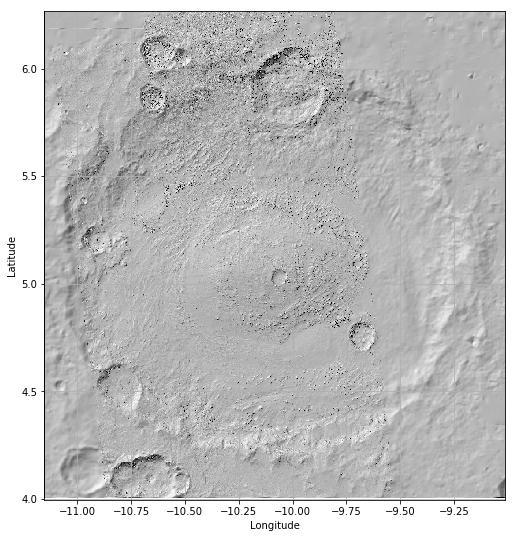

In [17]:
fig = plt.figure(figsize=(12,9))
ax = fig.gca()

ax.imshow(basemap_img, extent=extent, aspect=1, cmap='gray')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True)

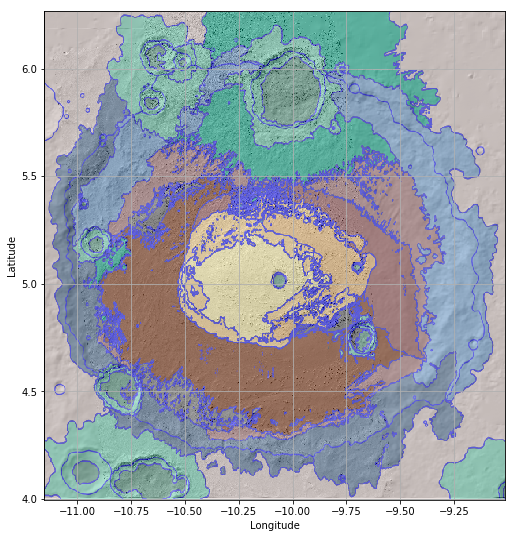

In [18]:
fig = plt.figure(figsize=(12,9))
ax = fig.gca()

# extent = [bbox[i] for i in [0,2,1,3]]

ax.imshow(basemap_img, extent=extent, aspect=1, cmap='gray')

ax.imshow(map_img, extent=extent, aspect=1, alpha=0.5)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True)

## Geopackage

In [19]:
url = 'https://data.planmap.eu/pub/moon/PM-MOO-MS-Copernicus_01/vector/PM-MOO-MS-Copernicus_01.gpkg'

In [20]:
import geopandas as gpd

In [21]:
gdf = gpd.read_file(url, driver='GPKG')

In [22]:
gdf

,OBJECTID,SHAPE_Length,Type,geometry
0,20,15359.704123,Certain,(LINESTRING (-634831.9464999996 303921.1893000...
1,63,7975.003199,Certain,"(LINESTRING (-620009.824 318656.5841999999, -6..."
2,76,6203.384049,Certain,(LINESTRING (-608620.8967000004 320916.9128999...
3,80,6570.690206,Certain,(LINESTRING (-604765.4352000002 321917.0340999...
4,84,3908.820638,Certain,(LINESTRING (-600076.1887999997 317065.5547000...
5,85,4429.480571,Certain,(LINESTRING (-603536.7933999998 318040.7097999...
6,88,22022.550011,Certain,(LINESTRING (-595842.5531000001 318523.9497000...
7,105,3910.464166,Certain,(LINESTRING (-580214.3801999995 290000.4737999...
8,106,13725.606020,Certain,(LINESTRING (-582041.5175999999 284309.4786999...
9,142,1903.372560,Approximate,(LINESTRING (-638152.6331000002 293103.8149000...


In [23]:
gdf.crs

{'proj': 'eqc',
 'lat_ts': 0,
 'lat_0': 0,
 'lon_0': 0,
 'x_0': 0,
 'y_0': 0,
 'a': 1737400,
 'b': 1737400,
 'units': 'm',
 'no_defs': True}

In [24]:
gdf.total_bounds

array([-657047.51684044,  244364.7184    , -559748.646517  ,
        338362.8683    ])

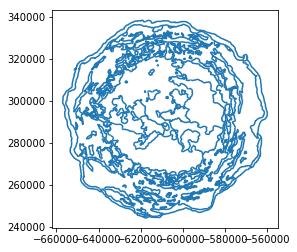

In [25]:
gdf.plot()

## WCS

In [26]:
from owslib.wcs import WebCoverageService

pmwcs = WebCoverageService(PLANMAP + '/wcs', version='1.0.0')

In [27]:
list(pmwcs.contents)

['mars:PM-MAR-MS-Crommelin_01_Merged_DEM_shaded_relief',
 'mars:USGS_mars_global_dem_463m',
 'mercury:USGS_mercury_global_dem_665m',
 'moon:USGS_moon_global_shade_128ppd']

In [28]:
cov_ = pmwcs['mars:PM-MAR-MS-Crommelin_01_Merged_DEM_shaded_relief']
cov_.id

'mars:PM-MAR-MS-Crommelin_01_Merged_DEM_shaded_relief'

In [29]:
cov_.boundingboxes

[{'nativeSrs': 'EPSG:4326',
  'bbox': (10008315.554195119, 235310.0, 10135275.554195119, 369150.0)}]

In [30]:
cov_.boundingBoxWGS84

(-11.15366298984571, 3.996357038901298, -9.011770997059442, 6.269216789818856)

In [31]:
cov_data = pmwcs.getCoverage(identifier=cov_.id, format='image/tiff', 
                             bbox=cov_.boundingBoxWGS84, 
                             crs=cov_.boundingboxes[0]['nativeSrs'],
                            width=800, height=600)

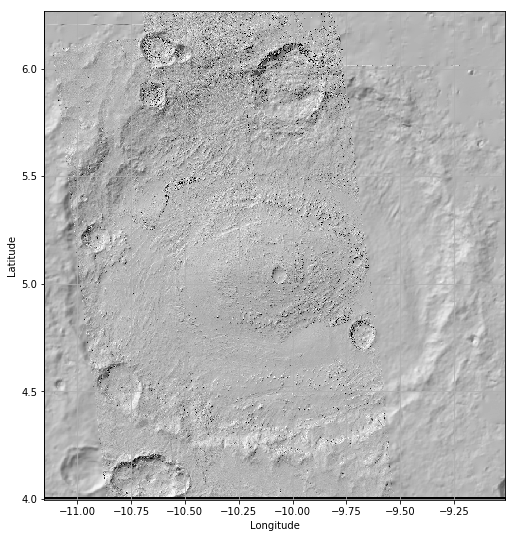

In [32]:
from matplotlib import pyplot as plt
import io

cov_img = plt.imread(io.BytesIO(cov_data.read()), format='tiff')

fig = plt.figure(figsize=(12,9))
ax = fig.gca()

extent = [bbox[i] for i in [0,2,1,3]]

ax.imshow(cov_img, extent=extent, aspect=1, alpha=1, cmap='gray')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True)